In [1]:
import torch
import numpy as np
from neurodiffeq import diff
from neurodiffeq.networks import FCNN
from neurodiffeq.pde import DirichletBVP2D, solve2D, ExampleGenerator2D, Monitor2D

In [2]:
%matplotlib notebook

In [6]:
def ana_sol(u, x, y):
    return x * (1-x) * y * (1-y) * torch.exp(x - y)

def mse_func(u, x, y):
    sol = ana_sol(u, x, y)
    return torch.mean((u-sol)**2)

<IPython.core.display.Javascript object>


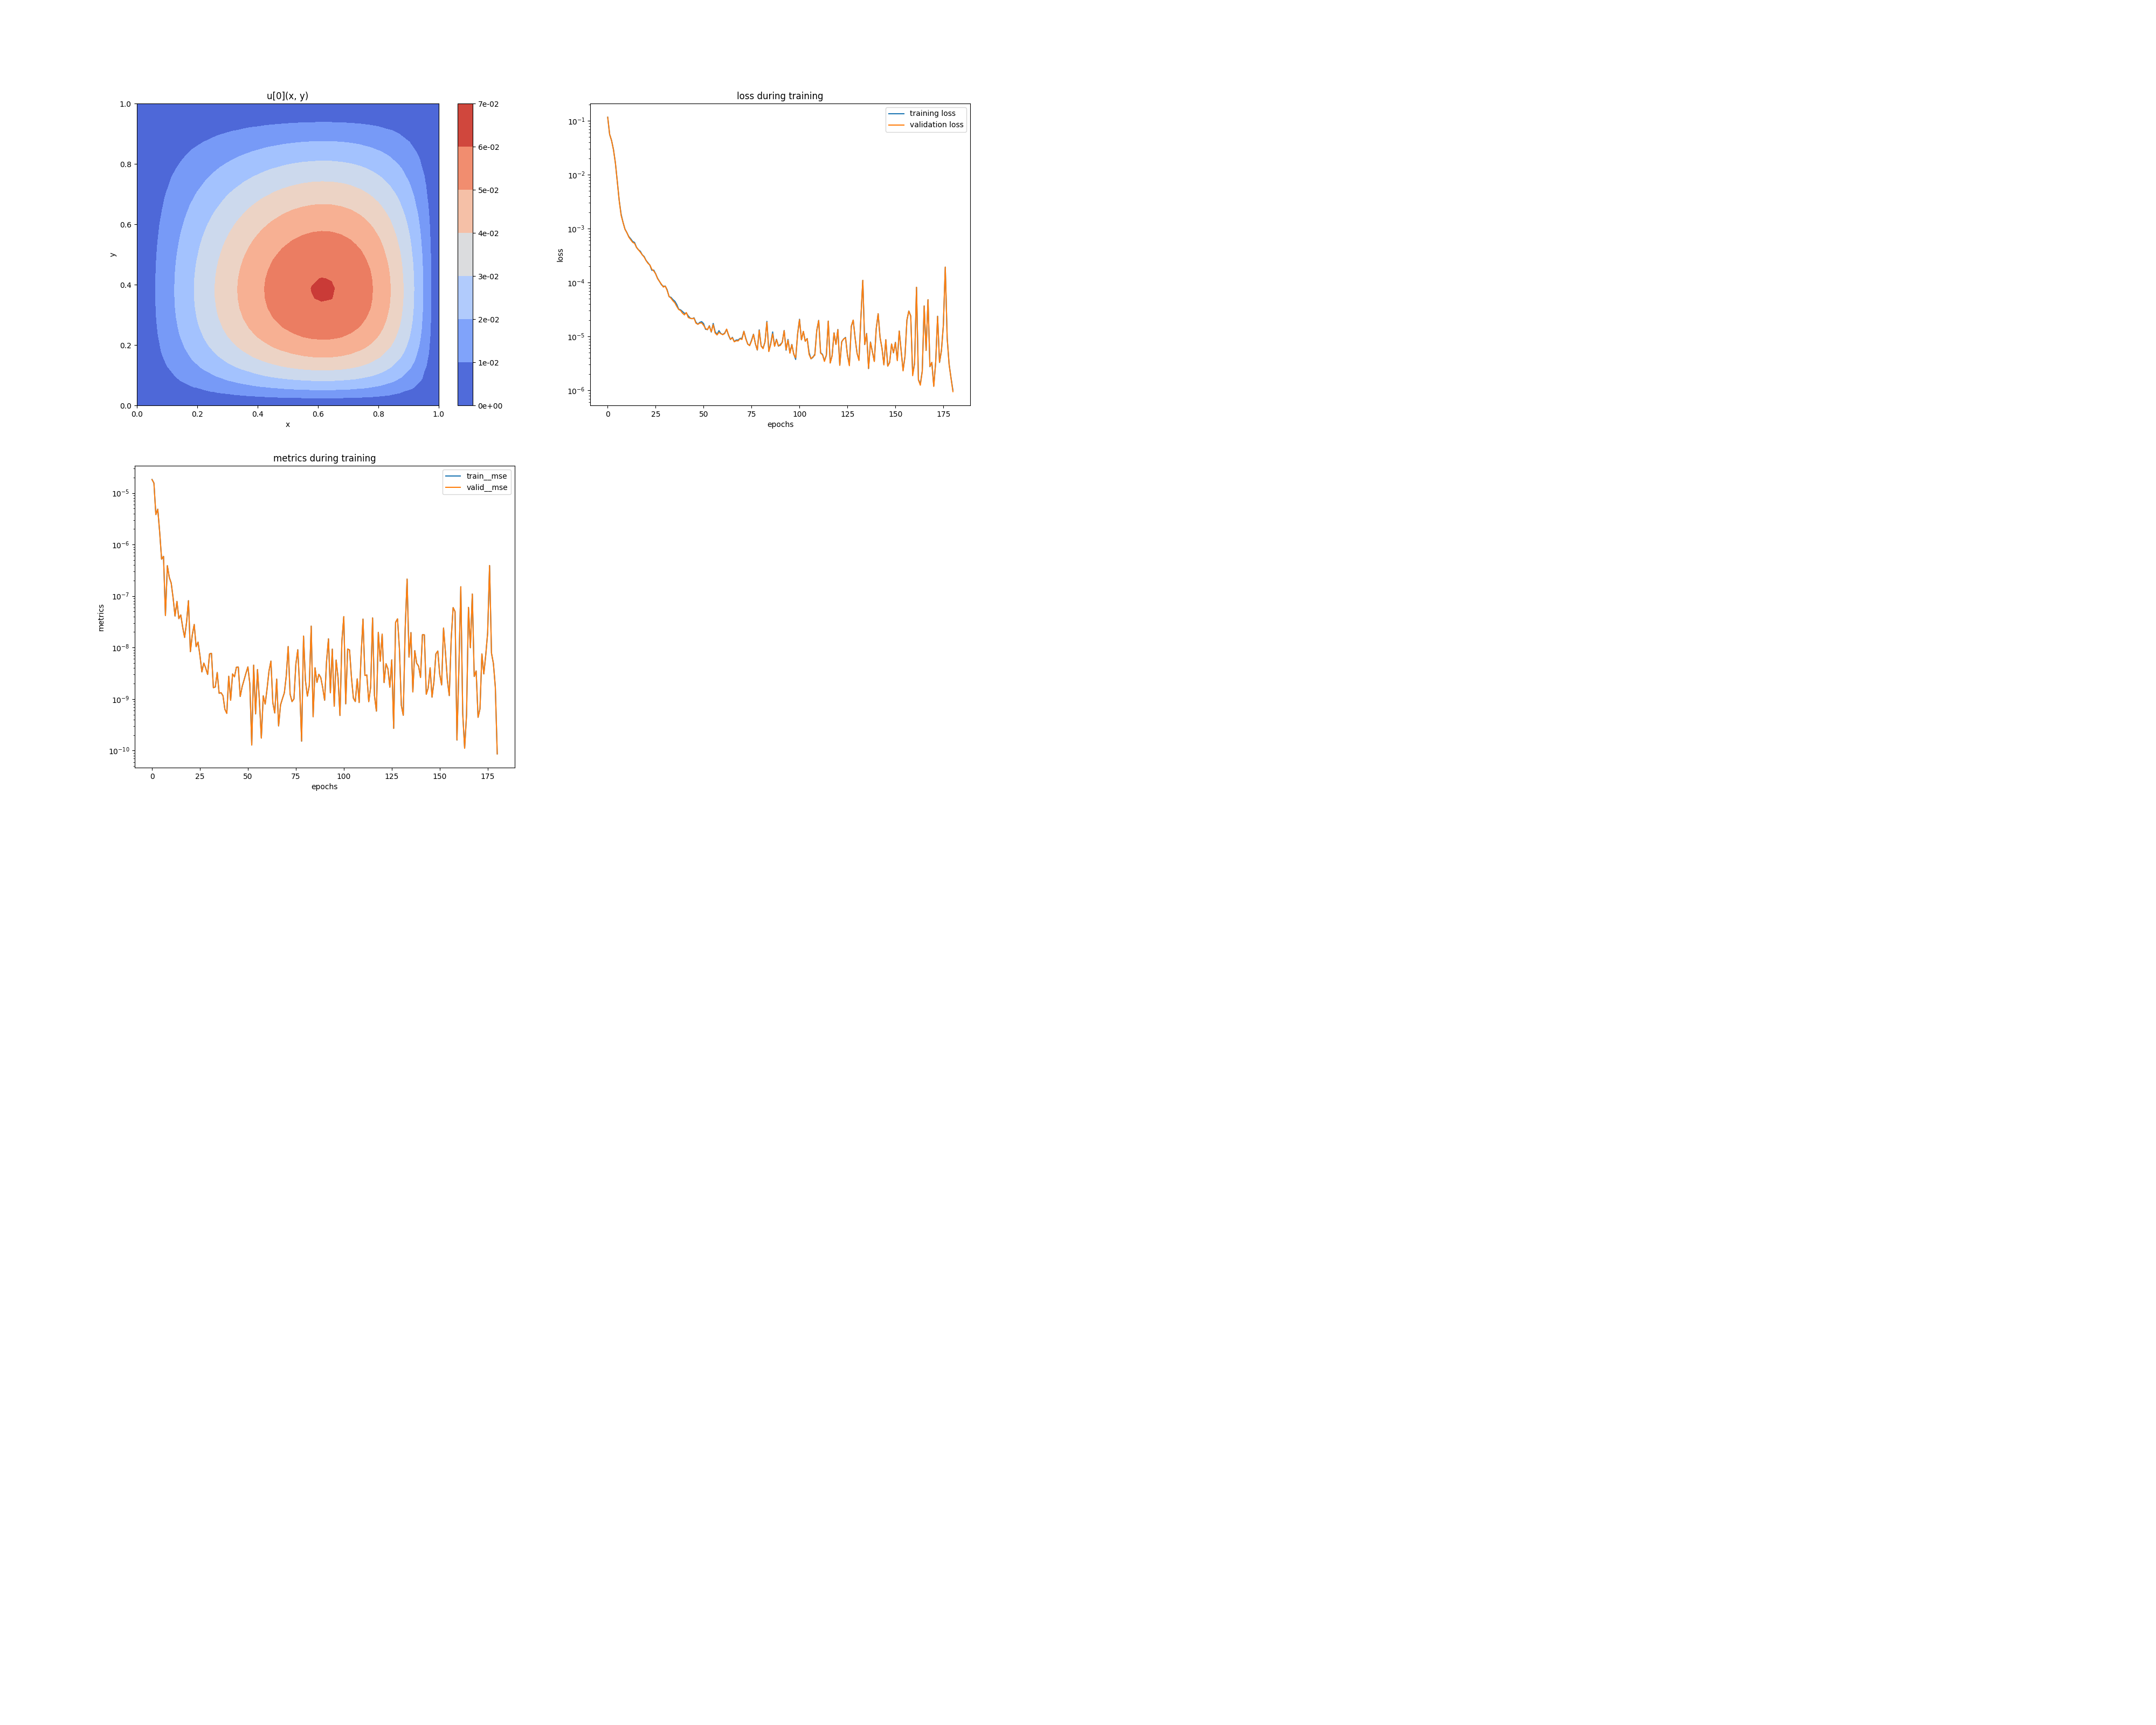

KeyboardInterrupt: 

In [7]:
poisson = lambda u, x, y: diff(u, x, order=2) + diff(u, y, order=2) - 2*x * (y - 1) * (y - 2*x + x*y + 2) * torch.exp(x - y)
bc = DirichletBVP2D(
    x_min=0, x_min_val=lambda y: 0,
    x_max=1, x_max_val=lambda y: 0,
    y_min=0, y_min_val=lambda x: 0,
    y_max=1, y_max_val=lambda x: 0
)
net = FCNN(n_input_units=2, n_hidden_units=32, n_hidden_layers=1)

solution_neural_net_laplace, _ = solve2D(
    pde=poisson, condition=bc, xy_min=(0, 0), xy_max=(1, 1),
    net=net, max_epochs=200, train_generator=ExampleGenerator2D(
        (32, 32), (0, 0), (1, 1), method='equally-spaced-noisy'
    ),
    monitor=Monitor2D(check_every=10, xy_min=(0, 0), xy_max=(1, 1)),
    metrics={"mse": mse_func}
)